## Predicting Customer Churn for a Bank using Machine Learning

#### Objectives:

The objective of this project is to predict whether a customer will churn (i.e., leave the bank) based on their demographic and account-related information. To help the bank proactively retain customers by offering incentives or interventions.

#### Business Impact: 

Reducing churn helps improve profitability by retaining valuable customers.

#### Dataset overview:

- Source: "/kaggle/input/churn-modelling/Churn_Modelling.csv"
- Rows: ~10,000
- Columns: 14 features + target Exited
- Target variable: Exited (1 = churned, 0 = stayed)
- Features include: CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, IsActiveMember, etc.

In [35]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#To disable warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/kaggle/input/churn-modelling/Churn_Modelling.csv


## 1. Data Cleaning & Preprocessing
Preparing the data for analysis and modeling.
* Remove: RowNumber, CustomerId, Surname (unnecessary)
* Handle missing values
* Encode categorical variables: Geography, Gender (use one-hot encoding or label encoding)

In [6]:
data_set = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")
data_set.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Drop unnecessary columns
data_set.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data_set.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data_set .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
data_set.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data_set[data_set.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [11]:
## Encode categorical variables
label_encoder = LabelEncoder()
data_set['Gender']= label_encoder.fit_transform(data_set['Gender'])
data_set = pd.get_dummies(data_set, columns =['Geography'], drop_first=True)

In [12]:
data_set.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


## 2. Exploratory Data Analysis (EDA) - Data Analyst Perspective

- Visualized churn distribution - Count plot
- Churn rate by age - histograms
- churn by countory - barplot
- Correlation matrix - heatmap

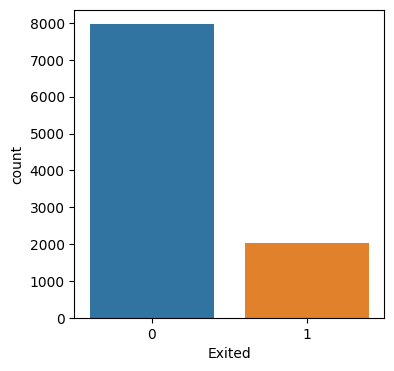

In [13]:
# Churn Distribution : Visualizing how many customers have churned vs stayed.

plt.figure(figsize=(4, 4))
sns.countplot(x='Exited', data=data_set)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

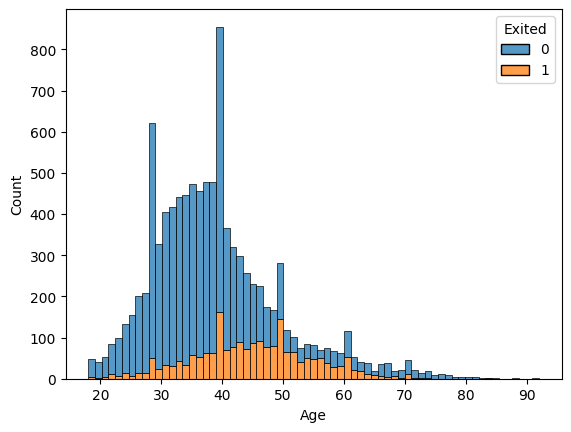

In [36]:
# Churn Rate by Age

sns.histplot(data=data_set, x='Age', hue='Exited', multiple='stack')

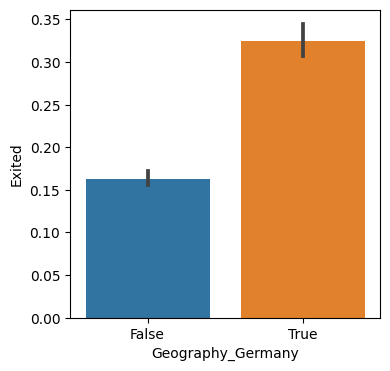

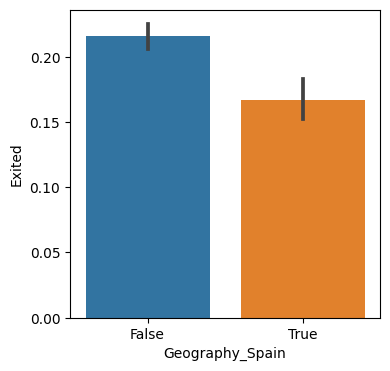

In [15]:
# Churn by Country 

plt.figure(figsize=(4, 4))
sns.barplot(x='Geography_Germany', y='Exited', data=data_set)
plt.show()
plt.figure(figsize=(4, 4))
sns.barplot(x='Geography_Spain', y='Exited', data=data_set)
plt.show()


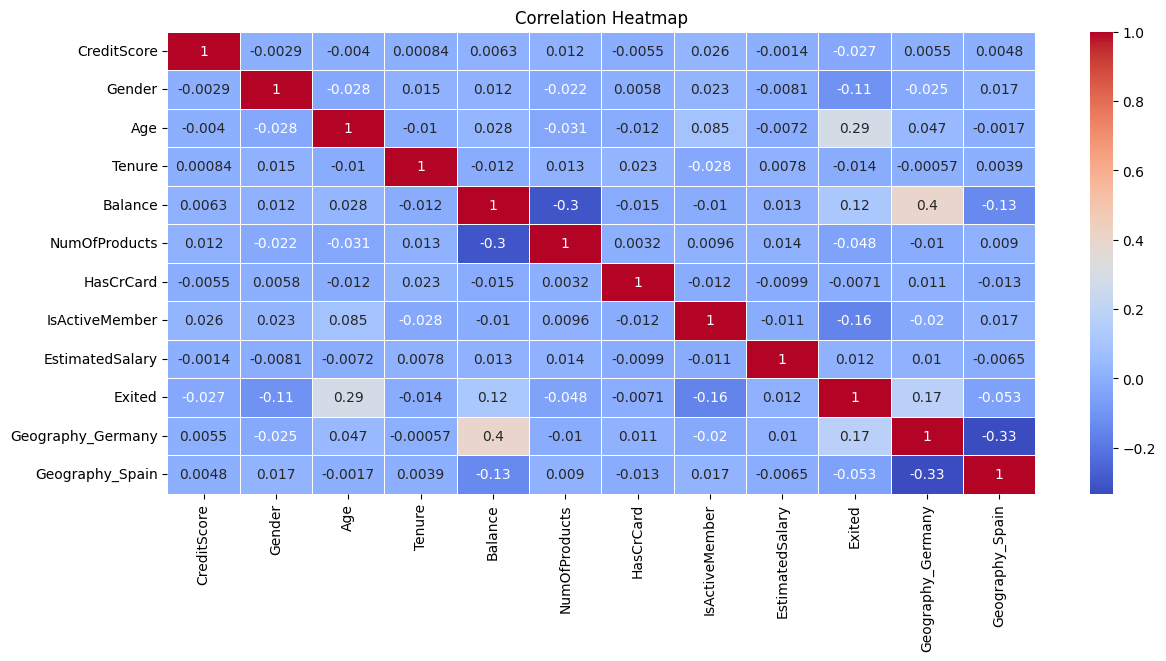

In [16]:
# Correlation Heatmap

plt.figure(figsize=(14, 6))
sns.heatmap(data_set.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 3. Feature Engineering

Create meaningful features to improve model performance:

- Age bucketing into age groups (e.g. 18-30, 31-40)
- HighBalance binary flag
- Interaction term: Balance_to_Products
- BalanceSalaryRatio, CreditScoreAgeRatio

In [17]:
# Bucket age for interpretability
data_set['AgeGroup'] = pd.cut(data_set['Age'], bins=[18,30,40,50,60,100], labels=['18-30','31-40','41-50','51-60','60+'])

# Binary indicator for high net balance
data_set['HighBalance'] = (data_set['Balance'] > 100000).astype(int)

# Smart ratios
data_set['BalanceSalaryRatio'] = data_set['Balance'] / (data_set['EstimatedSalary'] + 1)
data_set['CreditScoreAgeRatio'] = data_set['CreditScore'] / (data_set['Age'] + 1)
data_set['Balance_to_Products'] = data_set['Balance'] / (data_set['NumOfProducts'] + 1)

In [18]:
data_set.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,AgeGroup,HighBalance,BalanceSalaryRatio,CreditScoreAgeRatio,Balance_to_Products
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False,41-50,0,0.000000,14.395349,0.00
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True,41-50,0,0.744670,14.476190,41903.93
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False,41-50,1,1.401362,11.674419,39915.20
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False,31-40,0,0.000000,17.475000,0.00
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True,41-50,1,1.587035,19.318182,62755.41


## 4. Feature Scaling

Using StandardScaler for numerical features after train-test split.

In [19]:
# Features to scale
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 
              'BalanceSalaryRatio', 'CreditScoreAgeRatio', 'Balance_to_Products']

X= data_set[features]
y= data_set['Exited']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#lets scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train[:5],X_test[:5]

(array([[ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  1.36766974,
         -0.13383795,  0.65689409, -1.16582458],
        [-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  1.6612541 ,
         -0.10388614, -0.52962102,  0.22648192],
        [-0.96147213, -1.41636539, -0.69539349,  0.61862909, -0.25280688,
         -0.06828749,  0.96318029,  0.83735624],
        [-0.94071667, -1.13114808,  1.38675281,  0.95321202,  0.91539272,
         -0.09035993,  0.51035474,  1.20218681],
        [-1.39733684,  1.62595257,  1.38675281,  1.05744869, -1.05960019,
          0.04279679, -1.62599023,  1.31584688]]),
 array([[-0.57749609, -0.6557859 , -0.69539349,  0.32993735, -1.01960511,
         -0.02028056,  0.12555719, -0.04023113],
        [-0.29729735,  0.3900109 , -1.38944225, -1.21847056,  0.79888291,
         -0.13383795, -0.63454976, -1.16582458],
        [-0.52560743,  0.48508334, -0.3483691 , -1.21847056, -0.72797953,
         -0.13383795, -0.79109735, -1.16582458],
        [-1.51

In [23]:
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

## 5. Model Building

In [24]:
#Random forst model
R_model = RandomForestClassifier(n_estimators= 100 , random_state =42)
#n_estimators = no. of decisin trees that will be created in random forest (as its increases performance increases)
R_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Predicting on test set
y_pred = R_model.predict(X_test)

# Predicting probabilities for ROC AUC
y_proba = R_model.predict_proba(X_test)[:, 1]

In [26]:
#confusion matrix classification
C_matrix = confusion_matrix(y_test , y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", C_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy Score:", accuracy)
print("ROC AUC Score:", roc_score)

Confusion Matrix:
 [[1526   81]
 [ 279  114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      1607
           1       0.58      0.29      0.39       393

    accuracy                           0.82      2000
   macro avg       0.72      0.62      0.64      2000
weighted avg       0.79      0.82      0.79      2000

Accuracy Score: 0.82
ROC AUC Score: 0.7604342325481237


## Feature Importance

In [27]:
# Getting feature names (we have converted X_train as DataFrame)
features = X_train.columns
importances = R_model.feature_importances_

# Creating a Series for easy viewing
f_imp = pd.Series(importances, index=features).sort_values(ascending=False)

print(f_imp)

Age                    0.183066
CreditScoreAgeRatio    0.172286
EstimatedSalary        0.140500
CreditScore            0.139273
Balance_to_Products    0.104090
Balance                0.098550
BalanceSalaryRatio     0.087844
Tenure                 0.074391
dtype: float64


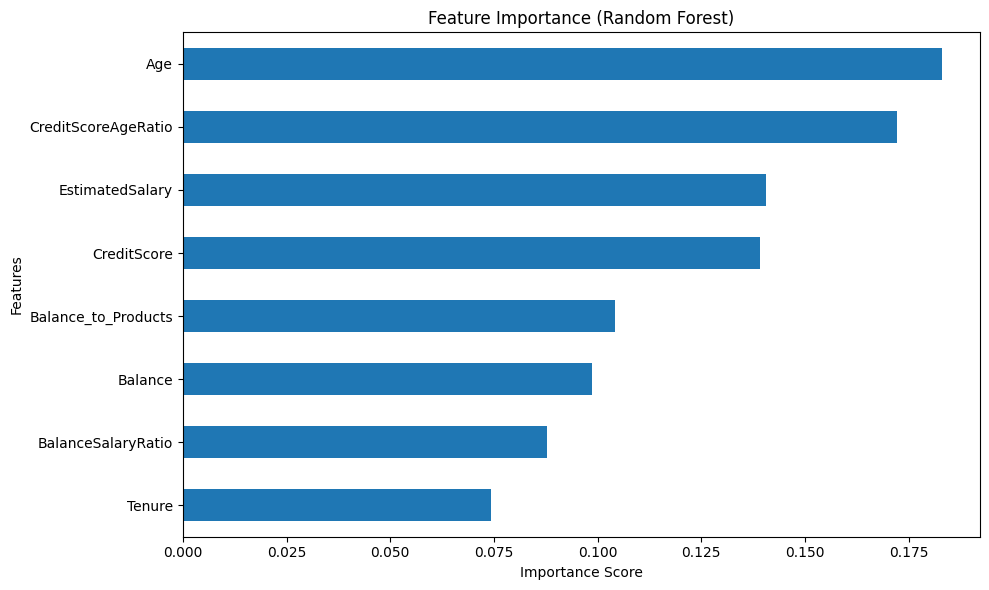

In [28]:
#Plotting feature importances
plt.figure(figsize=(10,6))
f_imp.plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression

# Building and trianing the logistic Regression model

lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train,y_train)

#Making prediction

y_pred_lr_model = lr_model.predict(X_test)

#evaluating model

C_matrix_lr_model = confusion_matrix(y_test , y_pred)
class_report_lr_model = classification_report(y_test, y_pred)
accuracy_lr_model = accuracy_score(y_test, y_pred)
roc_score_lr_model = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", C_matrix_lr_model)
print("\nClassification Report:\n", class_report_lr_model)
print("accuracy:", accuracy_lr_model)
print("ROC AUC Score:", roc_score_lr_model)

Confusion Matrix:
 [[1526   81]
 [ 279  114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      1607
           1       0.58      0.29      0.39       393

    accuracy                           0.82      2000
   macro avg       0.72      0.62      0.64      2000
weighted avg       0.79      0.82      0.79      2000

accuracy: 0.82
ROC AUC Score: 0.7604342325481237


In [30]:
from sklearn.svm import SVC

# Building and trianing the SVC model

svm_model = SVC(random_state = 42)
svm_model.fit(X_train,y_train)

#Making prediction

y_pred_svm_model = svm_model.predict(X_test)

#evaluating model

C_matrix_svm_model = confusion_matrix(y_test , y_pred)
class_report_svm_model = classification_report(y_test, y_pred)
accuracy_svm_model = accuracy_score(y_test, y_pred)
roc_score_svm_model = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", C_matrix_svm_model)
print("\nClassification Report:\n", class_report_svm_model)
print("accuracy:", accuracy_svm_model)
print("ROC AUC Score:", roc_score_svm_model)

Confusion Matrix:
 [[1526   81]
 [ 279  114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      1607
           1       0.58      0.29      0.39       393

    accuracy                           0.82      2000
   macro avg       0.72      0.62      0.64      2000
weighted avg       0.79      0.82      0.79      2000

accuracy: 0.82
ROC AUC Score: 0.7604342325481237


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Building and trianing the KNN model

knn_model = KNeighborsClassifier(n_neighbors = 42)
knn_model.fit(X_train,y_train)

#Making prediction

y_pred_knn_model = knn_model.predict(X_test)

#evaluating model

C_matrix_knn_model = confusion_matrix(y_test , y_pred)
class_report_knn_model = classification_report(y_test, y_pred)
accuracy_knn_model = accuracy_score(y_test, y_pred)
roc_score_knn_model = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", C_matrix_knn_model)
print("\nClassification Report:\n", class_report_knn_model)
print("accuracy:", accuracy_knn_model)
print("ROC AUC Score:", roc_score_knn_model)

Confusion Matrix:
 [[1526   81]
 [ 279  114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      1607
           1       0.58      0.29      0.39       393

    accuracy                           0.82      2000
   macro avg       0.72      0.62      0.64      2000
weighted avg       0.79      0.82      0.79      2000

accuracy: 0.82
ROC AUC Score: 0.7604342325481237


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Building and trianing the Gradient boosting model

gbm_model = GradientBoostingClassifier(n_estimators= 100, random_state = 42)
gbm_model.fit(X_train,y_train)

#Making prediction

y_pred_gbm_model = gbm_model.predict(X_test)

#evaluating model

C_matrix_gbm_model = confusion_matrix(y_test , y_pred)
class_report_gbm_model = classification_report(y_test, y_pred)
accuracy_gbm_model = accuracy_score(y_test, y_pred)
roc_score_gbm_model = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", C_matrix_gbm_model)
print("\nClassification Report:\n", class_report_gbm_model)
print("accuracy:", accuracy_gbm_model)
print("ROC AUC Score:", roc_score_gbm_model)

Confusion Matrix:
 [[1526   81]
 [ 279  114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      1607
           1       0.58      0.29      0.39       393

    accuracy                           0.82      2000
   macro avg       0.72      0.62      0.64      2000
weighted avg       0.79      0.82      0.79      2000

accuracy: 0.82
ROC AUC Score: 0.7604342325481237
